In [2]:
import numpy as np
from model_age import model_generate_age
from model_gender import model_generate_gender
from model_emotion import model_generate_emotion
from matplotlib.pyplot import imshow
%matplotlib inline


Using TensorFlow backend.


In [3]:
# Compute the accuracy of the emotion dataset
def compute_accuracy(model, X_test, Y_test):
    Y_test_pred = model.predict(X_test, verbose=1)
    Y_test_pred_arg = np.argmax(Y_test_pred, axis=1)
    count = 0
    for i in range(Y_test.shape[0]):
        if (Y_test[i][Y_test_pred_arg[i]] == np.max(Y_test[i])):
            count += 1
    accuracy_score_test = count / Y_test.shape[0]
    print(accuracy_score_test)

In [4]:
emotion_table = {0: 'neutral',
                 1: 'happiness',
                 2: 'surprise',
                 3: 'sadness',
                 4: 'anger',
                 5: 'disgust',
                 6: 'fear',
                 7: 'contempt'}

gender_table = {0: 'man',
                1: 'woman'
               }

# Read the dataset
X_test = np.load('./emotion/Test/final_data.npy')
Y_test = np.load('./emotion/Test/final_labels_data.npy')

In [ ]:
# model init
model_emotion, model_gender, model_age = model_generate_emotion(8), model_generate_gender(2), model_generate_age(1)


In [6]:
# Load the weights into our models
model_emotion.load_weights('weights-emotion.h5')
model_gender.load_weights('weights-gender.h5')
model_age.load_weights('weights-age.h5')

In [7]:
# Test set accuracy
compute_accuracy(model_emotion, X_test, Y_test)

3507/3507 [==============================] - 262s 75ms/step
0.8400342172797263


In [67]:
# accuracies
#from sklearn.metrics import confusion_matrix
#Y_test_pred = model_emotion.predict(X_test, verbose=1)

pred_ind = np.argmax(Y_test_pred, axis=1)
predicted_emotion = [emotion_table.get(key) for key in pred_ind]

act_ind = np.argmax(Y_test, axis=1)
actual_emotion = [emotion_table.get(key) for key in act_ind]

conf_tab = confusion_matrix(predicted_emotion, actual_emotion)
print(conf_tab)

[[ 237    3   10    3    4   16   10    8]
 [   0    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   3    0    0   37    1    3    6    8]
 [  19    1    1    1  882   33   10   14]
 [  37   14    2    7   14 1041  109   11]
 [   9    6    3   11   10  130  296    2]
 [  10    2    2   37   14   27    6  395]]


Normalized confusion matrix
[[0.81 0.01 0.03 0.01 0.01 0.05 0.03 0.03]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.   0.64 0.02 0.05 0.1  0.14]
 [0.02 0.   0.   0.   0.92 0.03 0.01 0.01]
 [0.03 0.01 0.   0.01 0.01 0.84 0.09 0.01]
 [0.02 0.01 0.01 0.02 0.02 0.28 0.63 0.  ]
 [0.02 0.   0.   0.08 0.03 0.05 0.01 0.8 ]]


C:\Users\yantongz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


NameError: name 'itertools' is not defined

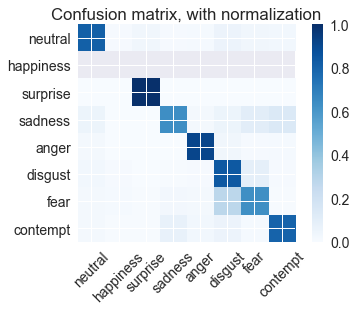

In [71]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_tab, classes=emotion_table.values(), normalize = True, 
                      title='Confusion matrix, with normalization')

### Image example

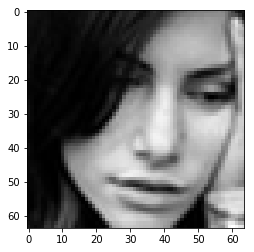

In [8]:
img = np.reshape(X_test[222], newshape=(1,64,64,1))
imshow(np.reshape(img, newshape=(64,64)), cmap='gray')

In [9]:
actual_emotion = emotion_table[np.argmax(Y_test[300])]
print('Actual Emotion:', actual_emotion)

Actual Emotion: anger


In [10]:
predicted_emotion = emotion_table[np.argmax(model_emotion.predict(img))]
print('Predicted Emotion:', predicted_emotion)

Predicted Emotion: sadness


In [11]:
predicted_gender = gender_table[np.argmax(model_gender.predict(img))]
print('Predicted Gender:', predicted_gender)

Predicted Gender: woman
